<a href="https://colab.research.google.com/github/MJayabharathi/Stock-predicter-using-LSTM-Phase2/blob/main/Stock_predicter_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import yfinance as yf
stock_data = yf.download('', start='2010-01-01', end='2023-10-1')
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
87/87 [==============================] - 4s 24ms/step - loss: 0.0033
Epoch 2/10
87/87 [==============================] - 2s 24ms/step - loss: 1.3429e-04
Epoch 3/10
87/87 [==============================] - 2s 23ms/step - loss: 1.1832e-04
Epoch 4/10
87/87 [==============================] - 3s 30ms/step - loss: 1.1907e-04
Epoch 5/10
87/87 [==============================] - 3s 35ms/step - loss: 1.1664e-04
Epoch 6/10
87/87 [==============================] - 2s 25ms/step - loss: 1.0391e-04
Epoch 7/10
87/87 [==============================] - 2s 24ms/step - loss: 1.1350e-04
Epoch 8/10
87/87 [==============================] - 2s 24ms/step - loss: 9.5374e-05
Epoch 9/10
87/87 [==============================] - 2s 26ms/step - loss: 8.9289e-05
Epoch 10/10
21/21 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 0.027135795443555363


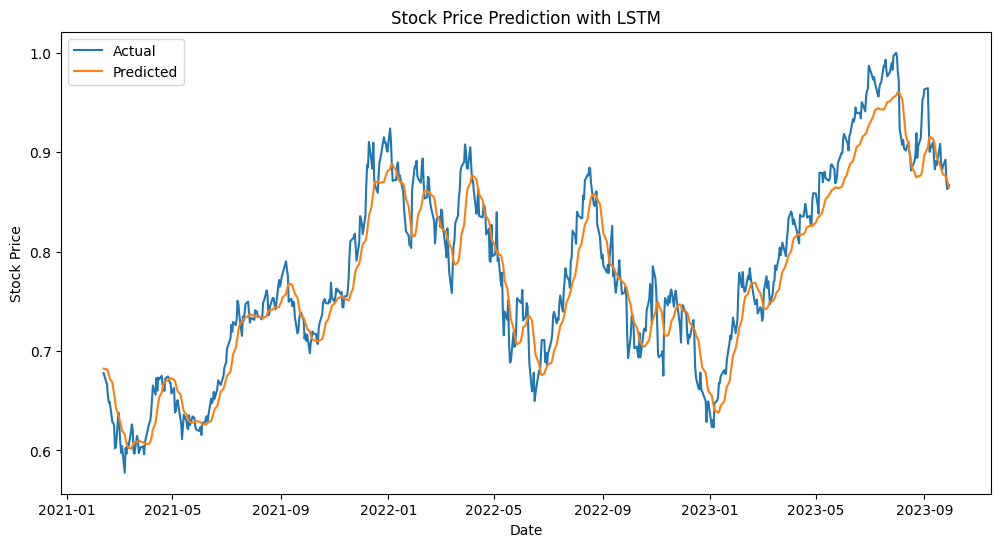

In [ ]:
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define a function to prepare the data for training
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define hyperparameters
window_size = 30  # Adjust the window size as needed
train_size = int(len(data) * 0.8)

# Prepare the data
X, y = prepare_data(data['Close'].values, window_size)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions on the test data
x_trainPred = model.predict(X_train)
x_testPred = model.predict(X_test)

# Inverse transform the predictions to original scale
# y_pred = scaler.inverse_transform(x_pred)
# y_test_original = scaler.inverse_transform(y_pred)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test,x_testPred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + window_size:], y_test, label='Actual')
plt.plot(data.index[train_size + window_size:], x_testPred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()


In [ ]:
# save the model
model.save("stock_predicter.h5")

# Optional: Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 5ms/step


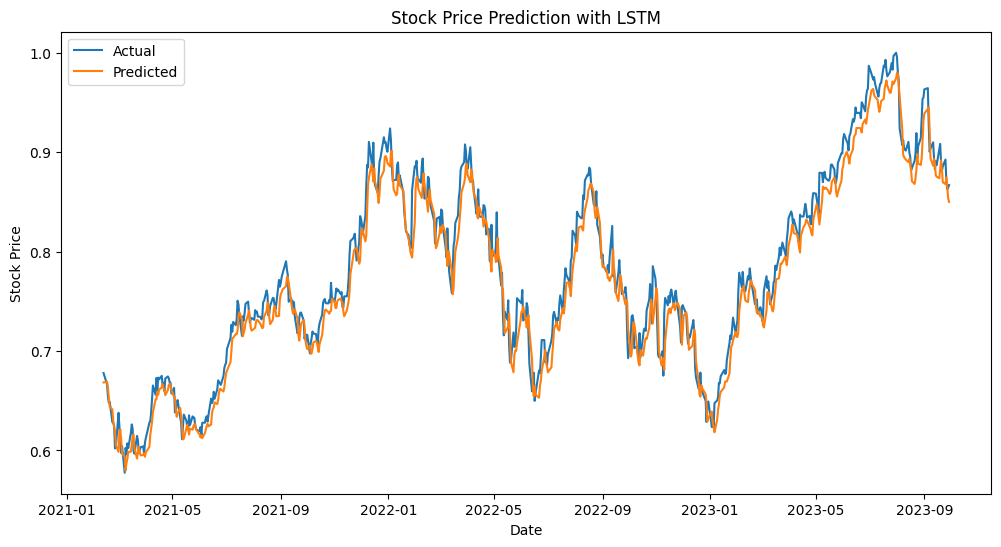

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Load your stock price data into a pandas DataFrame
data = pd.read_csv('/content/stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define a function to prepare the data for training
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define hyperparameters
window_size = 30  # Adjust the window size as needed
train_size = int(len(data) * 0.8)

# Prepare the data
X, y = prepare_data(data['Close'].values, window_size)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Load the pre-trained LSTM model in SavedModel format with ".pb" extension
model = tf.keras.models.load_model('/content/drive/MyDrive/Stock predicter model/stock_predicter.h5')

# Create a function for making predictions

# Make predictions on the test data
x_testPred = model.predict(X_test)

# Inverse transform the predictions to the original scale
# x_trainPred = scaler.inverse_transform(x_trainPred)
# x_testPred = scaler.inverse_transform(x_testPred)
# y_test_original = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + window_size:], y_test, label='Actual')
plt.plot(data.index[train_size + window_size:], x_testPred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()